<a href="https://colab.research.google.com/github/amirrhseiin/Traffic-Signs-Recognition/blob/main/Traffic_sign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Conv2D, MaxPooling2D,AveragePooling2D, Flatten, Dense, Dropout, Activation ,Concatenate, Input , BatchNormalization
from keras.optimizers import SGD
from keras import Model
from keras.models import load_model
from keras.utils import to_categorical, plot_model
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
import random
from keras.callbacks import ReduceLROnPlateau
%matplotlib inline

In [ ]:
train_data = pd.read_pickle(r'C:\Users\Admin\Desktop\jupyter projects\data1\train.pickle')
test_data= pd.read_pickle(r'C:\Users\Admin\Desktop\jupyter projects\data1\test.pickle')
valid_data= pd.read_pickle(r'C:\Users\Admin\Desktop\jupyter projects\data1\valid.pickle')

Y_train= train_data['labels']
X_train= train_data['features']
Y_train=to_categorical(Y_train)

Y_valid= valid_data['labels']
X_valid= valid_data['features']
Y_valid=to_categorical(Y_valid)

Y_test= test_data['labels']
X_test= test_data['features']
#Y_test=to_categorical(Y_test)


Y_train.astype('uint8')
Y_valid.astype('uint8')
Y_test.astype('uint8')



array([16,  1, 38, ...,  6,  7, 10], dtype=uint8)

In [ ]:
X_train= X_train.astype('float64')
X_test=X_test.astype('float64')
X_valid=X_valid.astype('float64')

X_train=X_train/ 255.0
X_test=X_test/ 255.0
X_valid=X_valid/ 255.0


In [ ]:
datagen = ImageDataGenerator(rotation_range=15, zoom_range = 0.1,
                             width_shift_range=0.1, height_shift_range=0.1) 

In [ ]:

X_train_data = datagen.flow(X_train, y=Y_train, batch_size = 256)
X_valid_data = datagen.flow(X_valid, y=Y_valid, batch_size = 256)


In [ ]:
es = EarlyStopping(monitor='val_loss', mode='auto', verbose=1, patience=1)
checkpointer = ModelCheckpoint(filepath="best_weights.hdf5", monitor = 'val_accuracy',mode="max",
                               verbose=1,save_best_only=True)

lrr= ReduceLROnPlateau(monitor='val_acc', factor=.01, patience=3, min_lr=1e-5) 

In [ ]:
input_model = Input((X_train.shape[1],X_train.shape[2],X_train.shape[3]),name = 'input_layer')

model1 = Conv2D(32,(5,5), activation='relu',name = 'Conv1_5')(input_model)
model1 = BatchNormalization(name = 'Bnorm1')(model1)
model1 = Conv2D(32,(5,5), activation='relu', padding='same',name= 'Conv2_5')(model1)
model1 = BatchNormalization(name = 'Bnorm2')(model1)
model1 = MaxPooling2D((2, 2),name = 'MaxPool1')(model1)
model1 = Conv2D(64,(3,3), activation='relu' ,padding='same',name = 'Conv3_3')(model1)
model1 = BatchNormalization(name = 'Bnorm3')(model1)
model1 = Conv2D(64,(3,3), activation='relu' ,padding='same',name = 'Conv4_3')(model1)
model1 = BatchNormalization(name = 'Bnorm4')(model1)
model1 = AveragePooling2D((2, 2),name = 'AvgPool1')(model1)
model1 = Conv2D(128,(1,1), activation='relu' ,padding='valid',name = 'Conv5_1')(model1)
model1 = BatchNormalization(name = 'Bnorm5')(model1)
###########
model1 = Flatten(name = 'Flatten')(model1)
###########
model1 = Dense(units = 36, activation = 'relu')(model1)
model1 = Dropout(rate = 0.2)(model1)
model1 = BatchNormalization()(model1)
model1 = Dense(units = 20, activation = 'relu')(model1)
model1 = BatchNormalization()(model1)
model1 = Dense(units = 15, activation = 'relu')(model1)
model1 = BatchNormalization()(model1)
output = Dense(units = 43, activation = 'softmax' , name='preds')(model1)

model = Model(inputs= [input_model], outputs=[output])
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 32, 32, 3)]       0         
_________________________________________________________________
Conv1_5 (Conv2D)             (None, 28, 28, 32)        2432      
_________________________________________________________________
Bnorm1 (BatchNormalization)  (None, 28, 28, 32)        128       
_________________________________________________________________
Conv2_5 (Conv2D)             (None, 28, 28, 32)        25632     
_________________________________________________________________
Bnorm2 (BatchNormalization)  (None, 28, 28, 32)        128       
_________________________________________________________________
MaxPool1 (MaxPooling2D)      (None, 14, 14, 32)        0         
_________________________________________________________________
Conv3_3 (Conv2D)             (None, 14, 14, 64)       

In [ ]:
#model =load_model('my_model.h5')    
sgd = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train_data, epochs= 10, validation_data= X_valid_data, 
                    verbose=1, callbacks=[es,checkpointer])

Epoch 1/10
136/136 [==============================] - ETA: 0s - loss: 2.8951 - accuracy: 0.2652
Epoch 00001: val_accuracy improved from -inf to 0.15215, saving model to best_weights.hdf5
136/136 [==============================] - 120s 882ms/step - loss: 2.8951 - accuracy: 0.2652 - val_loss: 3.3287 - val_accuracy: 0.1522
Epoch 2/10
136/136 [==============================] - ETA: 0s - loss: 1.7084 - accuracy: 0.4957
Epoch 00002: val_accuracy improved from 0.15215 to 0.34331, saving model to best_weights.hdf5
136/136 [==============================] - 120s 885ms/step - loss: 1.7084 - accuracy: 0.4957 - val_loss: 2.1294 - val_accuracy: 0.3433
Epoch 3/10
136/136 [==============================] - ETA: 0s - loss: 1.1205 - accuracy: 0.6607
Epoch 00003: val_accuracy improved from 0.34331 to 0.66190, saving model to best_weights.hdf5
136/136 [==============================] - 121s 886ms/step - loss: 1.1205 - accuracy: 0.6607 - val_loss: 1.1445 - val_accuracy: 0.6619
Epoch 4/10
136/136 [========

In [ ]:
model.save_weights('my_weights.h5') 
model.save('my_model.h5')               

In [ ]:
val_loss = history.history['val_loss']
loss = history.history['loss']

plt.plot(val_loss)
plt.plot(loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Val error','Train error'], loc='upper right')
plt.savefig('plot_error.png')
plt.show()

AttributeError: 'NoneType' object has no attribute 'history'

In [ ]:
val_accuracy = history.history['val_accuracy']
accuracy = history.history['accuracy']

plt.plot(val_accuracy)
plt.plot(accuracy)
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(['Val accuracy','Train accuracy'], loc='upper right')
plt.savefig( 'plot_accuracy.png')
plt.show()

AttributeError: 'NoneType' object has no attribute 'history'

In [ ]:
Y_pred = model.predict(X_test)

In [ ]:
Y_pred=np.argmax(Y_pred, axis=1)
Y_test

array([16,  1, 38, ...,  6,  7, 10], dtype=uint8)

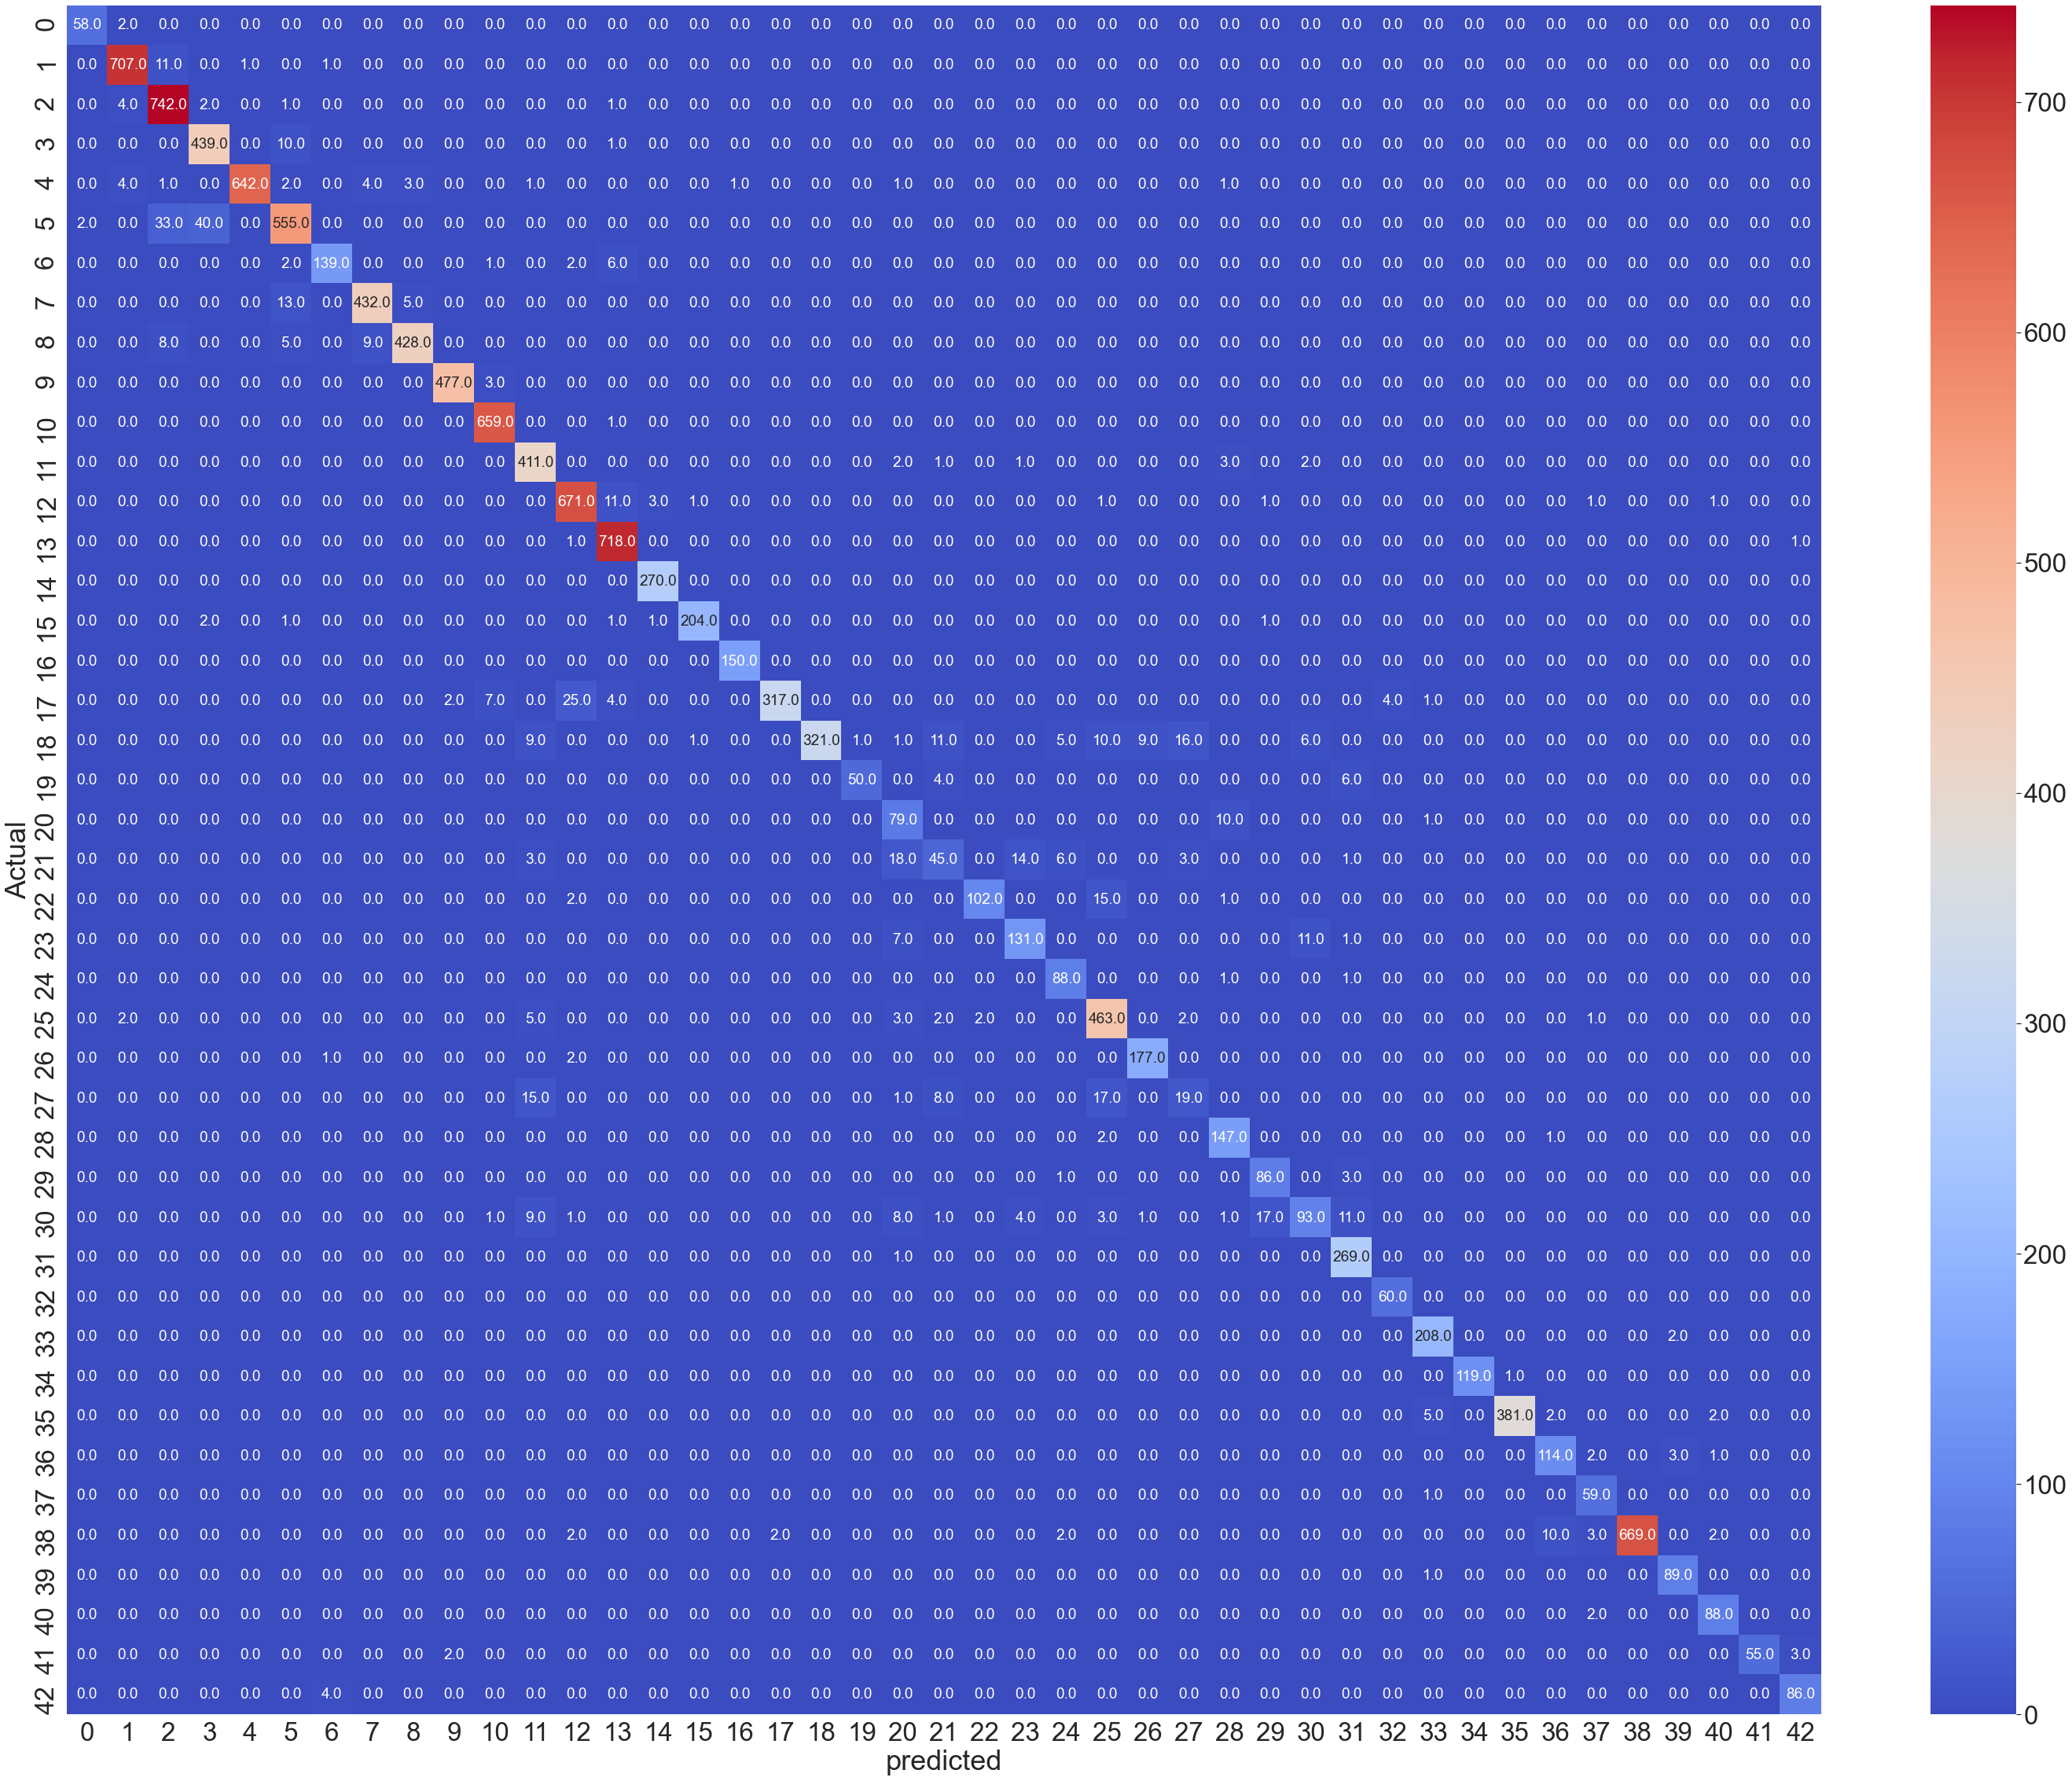

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
true=[]
pr=[]
for i in range(43):
    true.append(i)
    pr.append(i)
#arg_Y_test=np.argmax(Y_test,axis=1)
ddata=confusion_matrix(Y_test,Y_pred)
df=pd.DataFrame(ddata, columns=np.unique(true), index=np.unique(true))
df.index.name='Actual'
df.columns.name='predicted'
plt.figure(figsize=(50,40))
sns.set(font_scale=3)
sns.heatmap(df, cmap='coolwarm', annot=True, fmt=".1f", annot_kws={'size':19})

plt.savefig('confusion_heatmap.png')

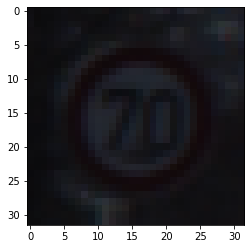

In [ ]:
img=X_train[8452]
plt.imshow(img)

layer : Conv1_5 , feature map shape : (1, 28, 28, 32)
nrow : 1 , ncol : 8


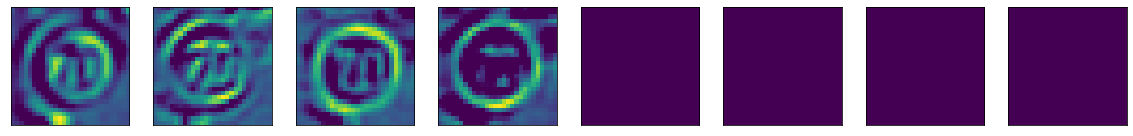

layer : Bnorm1 , feature map shape : (1, 28, 28, 32)
nrow : 1 , ncol : 8


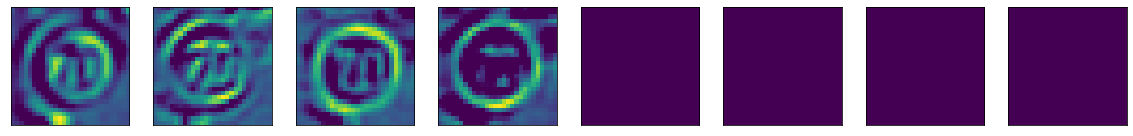

layer : Conv2_5 , feature map shape : (1, 28, 28, 32)
nrow : 1 , ncol : 8


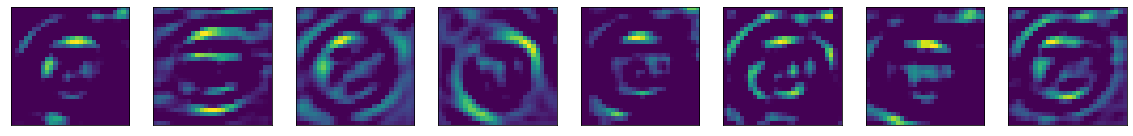

layer : Bnorm2 , feature map shape : (1, 28, 28, 32)
nrow : 1 , ncol : 8


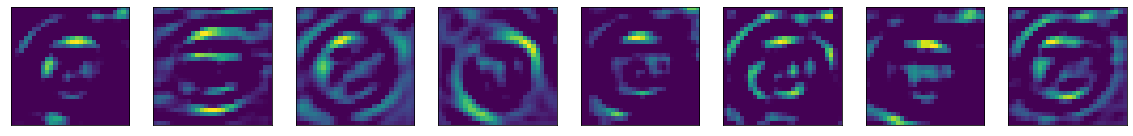

layer : MaxPool1 , feature map shape : (1, 14, 14, 32)
nrow : 1 , ncol : 8


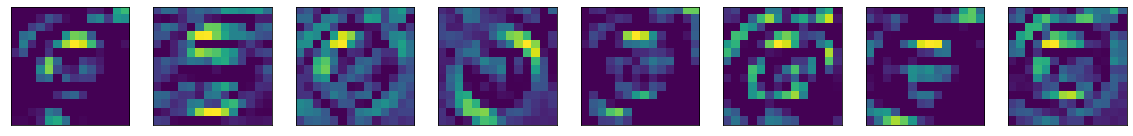

layer : Conv3_3 , feature map shape : (1, 14, 14, 64)
nrow : 1 , ncol : 8


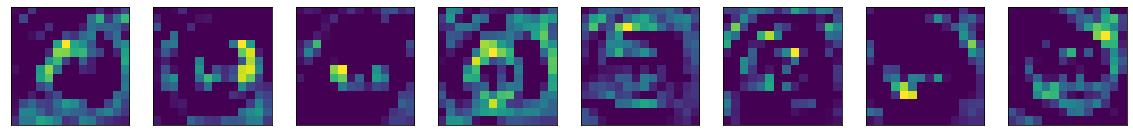

layer : Bnorm3 , feature map shape : (1, 14, 14, 64)
nrow : 1 , ncol : 8


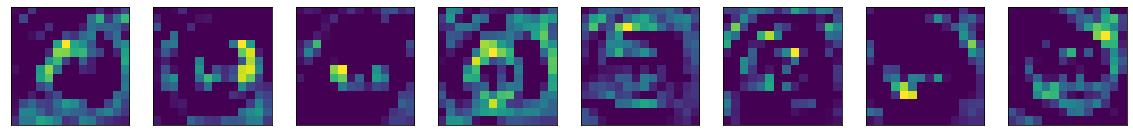

layer : Conv4_3 , feature map shape : (1, 14, 14, 64)
nrow : 1 , ncol : 8


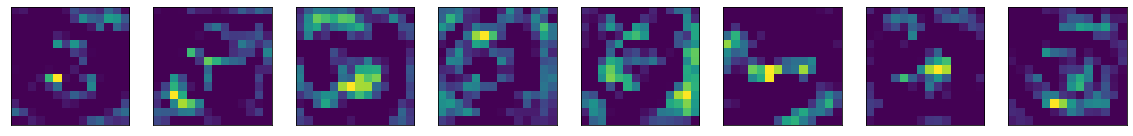

layer : Bnorm4 , feature map shape : (1, 14, 14, 64)
nrow : 1 , ncol : 8


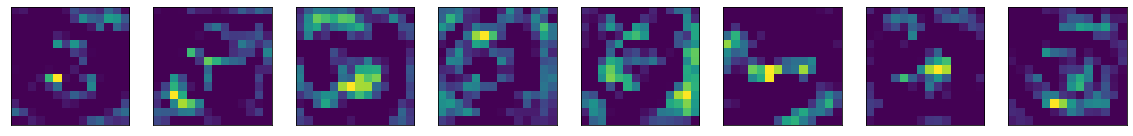

layer : AvgPool1 , feature map shape : (1, 7, 7, 64)
nrow : 1 , ncol : 8


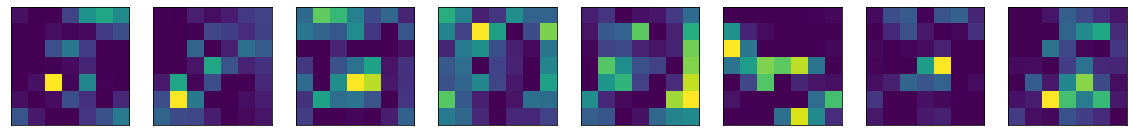

layer : Conv5_1 , feature map shape : (1, 7, 7, 128)
nrow : 1 , ncol : 8


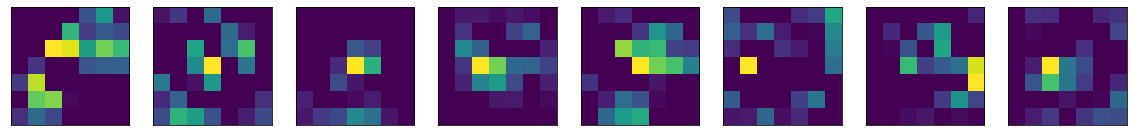

layer : Bnorm5 , feature map shape : (1, 7, 7, 128)
nrow : 1 , ncol : 8


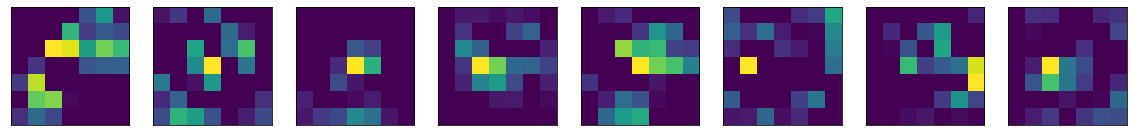

In [ ]:
random_selected=[]
for i in range(1,13):
  model_layer = Model(inputs=model.inputs, outputs=model.layers[i].output)
  feature_maps = model_layer.predict(X_train[8452].reshape(1,32, 32, 3))
  print('layer : {} , feature map shape : {}'.format(model.layers[i].name,feature_maps.shape))
  n_row = 1
  n_col = 8
  for _ in range(8):
    nums=random.randrange(feature_maps.shape[-1]) 
    random_selected.append(nums)
  print('nrow : {} , ncol : {}'.format(n_row,n_col))
  
  plt.figure(figsize=(20,15))
  ix = 1
  for row_number in range(n_row):
	  for col_number in range(n_col):
		  ax = plt.subplot(n_row, n_col, ix)
		  ax.set_xticks([])
		  ax.set_yticks([])
		  plt.imshow(feature_maps[0, :, :, random_selected[col_number]])
		  ix += 1
  plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        60
           1       0.98      0.99      0.99       720
           2       0.95      0.99      0.97       750
           3       0.99      0.90      0.94       450
           4       0.98      0.97      0.97       660
           5       0.89      0.94      0.92       630
           6       0.99      0.94      0.97       150
           7       0.97      0.96      0.96       450
           8       0.96      0.97      0.97       450
           9       0.98      1.00      0.99       480
          10       0.96      0.99      0.98       660
          11       0.97      0.91      0.94       420
          12       0.99      0.92      0.96       690
          13       0.98      1.00      0.99       720
          14       0.97      0.99      0.98       270
          15       0.96      0.99      0.97       210
          16       0.83      1.00      0.91       150
          17       1.00    